Jason Secula
Homework 3.4
           
The Net Work Output  = 2.114674465887342 kilojoule / cycle
1) The Net Work Output over time  = 119.83155306694937 kilowatt
2) The Thermal Efficiency is  = 0.006748553136148749 dimensionless
3) Evaluating WdotNet vs. CutOff Ratio
The CutOff Ratio r_c is = 1.1,
  Which results in a Net Work Output of  = 80.87111662548949 kilowatt
The CutOff Ratio r_c is = 1.78,
  Which results in a Net Work Output of  = 597.0283158527968 kilowatt
The CutOff Ratio r_c is = 2.46,
  Which results in a Net Work Output of  = 1051.5384362170214 kilowatt
The CutOff Ratio r_c is = 3.14,
  Which results in a Net Work Output of  = 1456.9271779802514 kilowatt
The CutOff Ratio r_c is = 3.82,
  Which results in a Net Work Output of  = 1822.8671281550926 kilowatt
The CutOff Ratio r_c is = 4.5,
  Which results in a Net Work Output of  = 2155.2789355489053 kilowatt


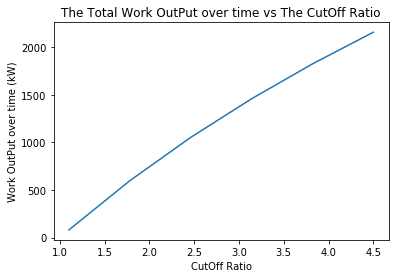

4) Evaluating Thermal Efficiency vs. CutOff Ratio
The CutOff Ratio r_c is = 1.1,
 The Thermal Efficiency becomes  = 0.6593725607236194 dimensionless
The CutOff Ratio r_c is = 1.78,
 The Thermal Efficiency becomes  = 0.5978038653216211 dimensionless
The CutOff Ratio r_c is = 2.46,
 The Thermal Efficiency becomes  = 0.5480429850280136 dimensionless
The CutOff Ratio r_c is = 3.14,
 The Thermal Efficiency becomes  = 0.5088317378743922 dimensionless
The CutOff Ratio r_c is = 3.82,
 The Thermal Efficiency becomes  = 0.47662876615533245 dimensionless
The CutOff Ratio r_c is = 4.5,
 The Thermal Efficiency becomes  = 0.44917725541961584 dimensionless


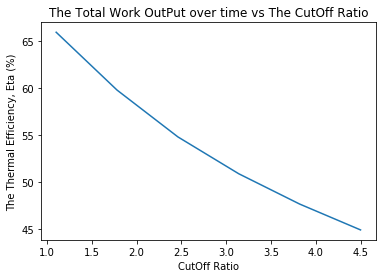

In [24]:
from thermostate import State, Q_, units
import matplotlib.pyplot as plt
from math import pi

print('Jason Secula')
print('Homework 3.4')
print('           ') #Line5
substance = 'air'
T_1 = Q_(25.0, 'degC')
p_1 = Q_(95.0, 'kPa')
V_1 = Q_(3.0, 'L')
r = Q_(18.0, 'dimensionless')
r_c = Q_(3.0, 'dimensionless')
rpm = Q_(1700.0, 'rpm')
n_C = Q_(4, 'dimensionless')
units.define('cycle = 2*revolution')  # Define a four-stroke cycle
r_c_low = Q_(1.1, 'dimensionless')
r_c_high = Q_(4.5, 'dimensionless')
#^_^Given-^-^-^-^-^-^-^-^-^-^-^-^-^ #line 18
#State 1
st_1 = State(substance, T=T_1, p=p_1)
v_2 = (st_1.v/r)
st_2 = State(substance, s=st_1.s, v=v_2) #Entropy Constant
#State 3
v_3=(r_c*v_2) 
st_3 = State(substance, p=st_2.p, v=v_3)
#State 4
st_4 = State(substance, v=st_1.v, s=st_3.s) 
#^_^_^ Entropy Constant at State 3, Volume Constant from 4 to 1.

m=(V_1/st_1.v)
Wnet = (m*((st_3.u -st_4.u)-(st_2.u-st_1.u))/units.cycle).to('kJ/cycle')
print('The Net Work Output  = {}'.format(Wnet)) #W_net in kJ/kg 
Wd_net = (n_C*(rpm)*(Wnet)).to('kW')
print('1) The Net Work Output over time  = {}'.format(Wd_net))
eta = (1-((st_4.u-st_1.u)/(st_3.u-st_4.u)))
print('2) The Thermal Efficiency is  = {}'.format(eta)) 

#4.4-1.1 = 3.4, 3.4/5 = 0.68
print('3) Evaluating WdotNet vs. CutOff Ratio')
for r_cb in [1.1, 1.78, 2.46, 3.14, 3.82, 4.5]:
    v_3b =(r_cb*v_2) # Letter b for second version 
    st_3b = State(substance, p=st_3.p, v=v_3b) 
    st_4b = State(substance, s=st_3b.s, v=st_1.v) 
    W_23b = (st_2.p*(st_3b.v-st_2.v)) 
    W_34b = (st_3b.u-st_4b.u)
    Wnetb = (m*(W_12+W_23b+W_34b))
    Wd_netb=(n_C*(rpm/2)*Wnetb).to('kW')
    print('The CutOff Ratio r_c is = {},'.format(r_cb))
    print('  Which results in a Net Work Output of  = {}'.format(Wd_netb))
plt.plot([1.1, 1.78, 2.46, 3.14, 3.82, 4.5],
         [80.87,597.02,1051.53,1456.92,1822.88, 2155.28])
plt.title('The Total Work OutPut over time vs The CutOff Ratio')
plt.ylabel('Work OutPut over time (kW)')
plt.xlabel('CutOff Ratio')
plt.show()

print('4) Evaluating Thermal Efficiency vs. CutOff Ratio')
for r_cc in [1.1, 1.78, 2.46, 3.14, 3.82, 4.5]: 
    v_3c=(r_cc*v_2) # Letter c for Third version 
    st_3c=State('air', p=st_3.p, v=v_3c)
    st_4c=State('air', s=st_3c.s, v=st_1.v)
    etac = (1-((st_4c.u-st_1.u)/(st_3c.h-st_2.h)))
    print('The CutOff Ratio r_c is = {},'.format(r_cc))
    print(' The Thermal Efficiency becomes  = {}'.format(etac)) 
plt.plot([1.1, 1.78, 2.46, 3.14, 3.82, 4.5],
         [65.93,59.78,54.80,50.88,47.66, 44.91])
plt.title('The Total Work OutPut over time vs The CutOff Ratio')
plt.ylabel('The Thermal Efficiency, Eta (%)')
plt.xlabel('CutOff Ratio')
plt.show() 